In [3]:
import pickle
import datetime
from numpy import array
import matplotlib.pylab as plt
import pandas as pd
import covsirphy as cs
import numpy as np
from itertools import cycle
import seaborn as sns
sns.set()
%matplotlib inline

In [4]:
# Download datasets
data_loader = cs.DataLoader("input")
jhu_data = data_loader.jhu()
population_data = data_loader.population()
oxcgrt_data = data_loader.oxcgrt()

Retrieving COVID-19 dataset in Japan from https://github.com/lisphilar/covid19-sir/data/japan


KeyboardInterrupt: 

In [ ]:
country = "United Kingdom"
s = cs.Scenario(jhu_data, population_data, country=country)

In [ ]:
days, df_periods = s.estimate_delay(oxcgrt_data)
print(days)

In [ ]:
s.trend()
s.estimate(cs.SIRF)

In [ ]:
tracker = s.track()
tracker.head()
tracker = tracker.set_index("Date")
tracker = tracker.groupby("Date").mean()
tracker = tracker.shift(days)

In [ ]:
ox_df = oxcgrt_data.cleaned()
ox_df = ox_df[ox_df["Country"] == country]
ox_df = ox_df.groupby("Date").mean()
ox_df.head()

In [ ]:
merged = pd.merge(ox_df.reset_index(), tracker.reset_index(), on="Date", how="inner")
merged

In [9]:
measures = ox_df.columns
# measures = [measures[0]]
interests = ["theta", "kappa", "rho", "sigma", "1/gamma [day]", "alpha1 [-]",  "1/alpha2 [day]", "1/beta [day]", "Measure"]
params_total = pd.DataFrame(columns=interests)

for i in range(len(measures)):
    measure = measures[i]
    values = ox_df[measure].values
    high = np.max(values)
    dates = ox_df[ox_df[measure] == high].reset_index()["Date"]
    subset = tracker.reset_index()[tracker.reset_index()["Date"].isin(dates)]
    means_df = subset.mean()[interests[:-1]]
    means_df["Measure"] = measure
    params_total.loc[i] = means_df
params_total = params_total.set_index("Measure")
params_total



,theta,kappa,rho,sigma,1/gamma [day],alpha1 [-],1/alpha2 [day],1/beta [day]
Measure,,,,,,,,
School_closing,0.094673,0.000960,0.136423,0.033299,80.714286,0.094800,1195.000000,9.114286
Workplace_closing,0.070069,0.001118,0.166809,0.019385,110.137255,0.070255,994.490196,6.784314
Cancel_events,0.041217,0.000635,0.084689,0.052155,32.944079,0.041299,19250.927632,13.348684
Gatherings_restrictions,0.041353,0.000631,0.084019,0.052360,32.289037,0.041435,19431.342193,13.395349
Transport_closing,0.041149,0.000640,0.085424,0.051859,33.656863,0.041232,19130.163399,13.294118
Stay_home_restrictions,0.058987,0.001047,0.147955,0.024837,89.825397,0.059127,1060.460317,7.873016
Internal_movement_restrictions,0.073930,0.001101,0.163821,0.020605,107.000000,0.074120,1016.200000,6.960000
International_movement_restrictions,0.006864,0.000588,0.085580,0.049582,20.370370,0.006852,2517.518519,11.629630
Information_campaigns,0.040607,0.000674,0.091305,0.049498,39.359133,0.040693,18164.049536,12.857585


In [12]:
params_total = params_total.round(decimals=4)
params_total.to_csv("parameters_UK.csv")
params_total = params_total.reset_index()

In [23]:
# Create scenario
name = 'Gatherings_restrictions'
selection = params_total[params_total["Measure"] == name]
preset_dict = {
    "theta": selection["theta"].values[0],
    "kappa": selection["kappa"].values[0],
    "sigma": selection["sigma"].values[0],
    "rho": selection["rho"].values[0]
}
print(preset_dict)
s.summary()

{'theta': 0.0414, 'kappa': 0.0006, 'sigma': 0.0524, 'rho': 0.084}


Type      Start        End  Population  \
Scenario                Phase                                             
Main                    0th      Past  16Feb2020  11Apr2020    66460344   
                        1st      Past  12Apr2020  05May2020    66460344   
                        2nd      Past  06May2020  15Jun2020    66460344   
                        3rd      Past  16Jun2020  09Sep2020    66460344   
                        4th      Past  10Sep2020  02Oct2020    66460344   
                        5th      Past  03Oct2020  12Oct2020    66460344   
                        6th      Past  13Oct2020  20Oct2020    66460344   
                        7th      Past  21Oct2020  27Oct2020    66460344   
                        8th      Past  28Oct2020  04Nov2020    66460344   
                        9th      Past  05Nov2020  11Nov2020    66460344   
                        10th     Past  12Nov2020  19Nov2020    66460344   
                        11th     Past  20Nov2020  29Nov2020    66460344   
                        12th     Past  30Nov2020  09Dec2020    66460344   
                        13th     Past  10Dec2020  16Dec2020    66460344   
                        14th     Past  17Dec2020  22Dec2020    66460344   
                        15th     Past  23Dec2020  28Dec2020    66460344   
                        16th     Past  29Dec2020  07Jan2021    66460344   
                        17th     Past  08Jan2021  19Jan2021    66460344   
Gatherings_restrictions 0th      Past  16Feb2020  11Apr2020    66460344   
                        1st      Past  12Apr2020  05May2020    66460344   
                        2nd      Past  06May2020  15Jun2020    66460344   
                        3rd      Past  16Jun2020  09Sep2020    66460344   
                        4th      Past  10Sep2020  02Oct2020    66460344   
                        5th      Past  03Oct2020  12Oct2020    66460344   
                        6th      Past  13Oct2020  20Oct2020    66460344   
                        7th      Past  21Oct2020  27Oct2020    66460344   
                        8th      Past  28Oct2020  04Nov2020    66460344   
                        9th      Past  05Nov2020  11Nov2020    66460344   
                        10th     Past  12Nov2020  19Nov2020    66460344   
                        11th     Past  20Nov2020  29Nov2020    66460344   
                        12th     Past  30Nov2020  09Dec2020    66460344   
                        13th     Past  10Dec2020  16Dec2020    66460344   
                        14th     Past  17Dec2020  22Dec2020    66460344   
                        15th     Past  23Dec2020  28Dec2020    66460344   
                        16th     Past  29Dec2020  07Jan2021    66460344   
                        17th     Past  08Jan2021  19Jan2021    66460344   
                        18th   Future  20Jan2021  18Feb2021    66460344   

                                 ODE     Rt     theta     kappa       rho  \
Scenario                Phase                                               
Main                    0th    SIR-F  23.04  0.030856  0.001292  0.197155   
                        1st    SIR-F   1.13  0.184689  0.000610  0.078106   
                        2nd    SIR-F   0.69  0.108370  0.000608  0.057752   
                        3rd    SIR-F   0.93  0.020632  0.000574  0.060061   
                        4th    SIR-F   2.28  0.000268  0.000402  0.092065   
                        5th    SIR-F   3.15  0.000908  0.000002  0.104675   
                        6th    SIR-F   2.44  0.000012  0.000566  0.076302   
                        7th    SIR-F   1.48  0.000442  0.000783  0.075410   
                        8th    SIR-F   1.26  0.000349  0.000710  0.067446   
                        9th    SIR-F   1.01  0.004705  0.000751  0.063162   
                        10th   SIR-F   0.99  0.016705  0.000202  0.061640   
                        11th   SIR-F   0.68  0.019713  0.000450  0.046386   
                        12th 

In [45]:
all_infecteds = pd.DataFrame()
target = "Infected"
measures_new = ['School_closing', 'Workplace_closing', 'Cancel_events',
       'Gatherings_restrictions', 'Transport_closing',
       'Stay_home_restrictions', 'Internal_movement_restrictions',
       'International_movement_restrictions']

for measure in measures_new:
    name = measure
    selection = params_total[params_total["Measure"] == name]
    preset_dict = {
        "theta": selection["theta"].values[0],
        "kappa": selection["kappa"].values[0],
        "sigma": selection["sigma"].values[0],
        "rho": selection["rho"].values[0]
    }
    print(measure, preset_dict)
    s.summary()

    s.clear(name=name)
    s.add(name=name, 
          end_date='01Mar2021',
          **preset_dict,
          mode=cs.SIRF)
    records = s.simulate(name=name, show_figure=False)
    all_infecteds[measure] = records[target]
    
all_infecteds["Date"] = records["Date"]

School_closing {'theta': 0.0947, 'kappa': 0.001, 'sigma': 0.0333, 'rho': 0.1364}
Workplace_closing {'theta': 0.0701, 'kappa': 0.0011, 'sigma': 0.0194, 'rho': 0.1668}
Cancel_events {'theta': 0.0412, 'kappa': 0.0006, 'sigma': 0.0522, 'rho': 0.0847}
Gatherings_restrictions {'theta': 0.0414, 'kappa': 0.0006, 'sigma': 0.0524, 'rho': 0.084}
Transport_closing {'theta': 0.0411, 'kappa': 0.0006, 'sigma': 0.0519, 'rho': 0.0854}
Stay_home_restrictions {'theta': 0.059, 'kappa': 0.001, 'sigma': 0.0248, 'rho': 0.148}
Internal_movement_restrictions {'theta': 0.0739, 'kappa': 0.0011, 'sigma': 0.0206, 'rho': 0.1638}
International_movement_restrictions {'theta': 0.0069, 'kappa': 0.0006, 'sigma': 0.0496, 'rho': 0.0856}


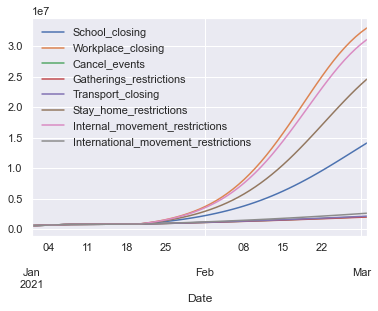

In [46]:
all_infecteds_subsection = all_infecteds.query("Date>='2021-01-01'")
all_infecteds_subsection.plot(x="Date", y=measures_new);

Sweden


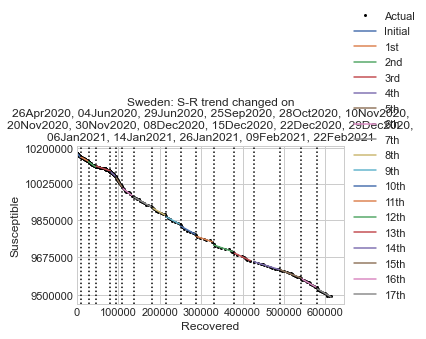


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 5th phase (06Jan2021 - 13Jan2021): finished  180 trials in 0 min 10 sec
	 3rd phase (26Jan2021 - 08Feb2021): finished   88 trials in 0 min 10 sec	 6th phase (09Feb2021 - 21Feb2021): finished   89 trials in 0 min 10 sec

	15th phase (30Nov2020 - 07Dec2020): finished   89 trials in 0 min 10 sec
	 7th phase (28Oct2020 - 09Nov2020): finished 1501 trials in 3 min  1 sec
	14th phase (04Jun2020 - 28Jun2020): finished 1538 trials in 3 min  1 sec
	17th phase (26Apr2020 - 03Jun2020): finished 1526 trials in 3 min  1 sec
	13th phase (29Jun2020 - 24Sep2020): finished 1527 trials in 3 min  2 sec
	16th phase (14Jan2021 - 25Jan2021): finished  121 trials in 0 min 10 sec
	 1st phase (08Dec2020 - 14Dec2020): finished  118 trials in 0 min 10 sec
	10th phase (22Dec2020 - 28Dec2020): finished 1665 trials in 3 min  1 sec
	12th phase (10Nov2020 - 19Nov2020): finished  116 trials in 0 min 10 sec
	 0th phase (22Feb2021 - 05Mar2021): fi

,Measure,rho,sigma,1/gamma [day],1/beta [day]
0,School_closing,0.006955,0.004023,24.405229,13.555556
1,Workplace_closing,0.005609,0.005445,15.225490,14.872549
2,Cancel_events,0.006198,0.004540,20.646240,14.877437
3,Gatherings_restrictions,0.005609,0.005445,15.225490,14.872549
4,Transport_closing,0.005967,0.004686,19.504425,15.283186
5,Stay_home_restrictions,0.006051,0.004633,19.919075,15.135838
6,Internal_movement_restrictions,0.006770,0.004570,20.930108,12.844086
7,International_movement_restrictions,0.006120,0.004589,20.261364,15.014205
8,Information_campaigns,0.006230,0.004519,20.806630,14.820442
9,Testing_policy,0.005395,0.004996,17.090909,16.487273


School_closing {'sigma': 0.004022869698176306, 'rho': 0.006955063704580932}
Workplace_closing {'sigma': 0.0054448477835935625, 'rho': 0.005608522081764426}
Cancel_events {'sigma': 0.004539606942706125, 'rho': 0.006197573240918539}
Gatherings_restrictions {'sigma': 0.0054448477835935625, 'rho': 0.005608522081764426}
Transport_closing {'sigma': 0.004685668621306172, 'rho': 0.00596684235234615}
Stay_home_restrictions {'sigma': 0.004632626280508207, 'rho': 0.00605063234121644}
Internal_movement_restrictions {'sigma': 0.004570063320749181, 'rho': 0.0067704832341389295}
International_movement_restrictions {'sigma': 0.004588840517041056, 'rho': 0.006119799888847192}
Stringency_index {'sigma': 0.005691539877291422, 'rho': 0.005475480834302899}
Germany


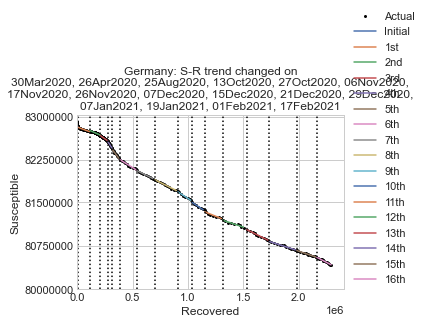


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 5th phase (17Feb2021 - 05Mar2021): finished  219 trials in 0 min 10 sec
	 3rd phase (19Jan2021 - 31Jan2021): finished  111 trials in 0 min 10 sec
	 6th phase (07Jan2021 - 18Jan2021): finished  113 trials in 0 min 10 sec
	 7th phase (15Dec2020 - 20Dec2020): finished  116 trials in 0 min 10 sec
	13th phase (27Oct2020 - 05Nov2020): finished  112 trials in 0 min 10 sec
	15th phase (23Jan2020 - 29Mar2020): finished 1473 trials in 3 min  2 sec
	14th phase (17Nov2020 - 25Nov2020): finished 1536 trials in 3 min  2 sec
	 4th phase (06Nov2020 - 16Nov2020): finished   94 trials in 0 min 10 sec
	 0th phase (30Mar2020 - 25Apr2020): finished 1494 trials in 3 min  2 sec
	10th phase (01Feb2021 - 16Feb2021): finished 1501 trials in 3 min  2 sec
	 1st phase (26Nov2020 - 06Dec2020): finished   93 trials in 0 min 10 sec
	16th phase (21Dec2020 - 28Dec2020): finished 1780 trials in 3 min  1 sec
	 8th phase (26Apr2020 - 24Aug2020): fi

,Measure,rho,sigma,1/gamma [day],1/beta [day]
0,School_closing,0.000903,0.000608,44.425197,13.976378
1,Workplace_closing,0.000701,0.000773,14.062500,15.775000
2,Cancel_events,0.000747,0.000630,26.615385,16.008547
3,Gatherings_restrictions,0.000769,0.000625,27.126214,15.556634
4,Transport_closing,0.000706,0.000763,14.197917,15.614583
5,Stay_home_restrictions,0.000701,0.000773,14.062500,15.775000
6,Internal_movement_restrictions,0.000722,0.000636,30.526104,16.911647
7,International_movement_restrictions,0.001112,0.000398,79.915254,12.457627
8,Information_campaigns,0.000775,0.000614,30.310249,15.731302
9,Testing_policy,0.000642,0.000646,17.474490,17.673469


School_closing {'sigma': 0.0006083497440127542, 'rho': 0.0009025654487447469}
Workplace_closing {'sigma': 0.0007727513400047758, 'rho': 0.000701247608688487}
Cancel_events {'sigma': 0.000629551267372943, 'rho': 0.0007474631014891872}
Gatherings_restrictions {'sigma': 0.0006247794817065516, 'rho': 0.0007690208009115616}
Transport_closing {'sigma': 0.0007631206446288063, 'rho': 0.0007056089438333782}
Stay_home_restrictions {'sigma': 0.0007727513400047758, 'rho': 0.000701247608688487}
Internal_movement_restrictions {'sigma': 0.0006363856540181936, 'rho': 0.0007215104798734109}
International_movement_restrictions {'sigma': 0.0003983710750647983, 'rho': 0.001112007836140207}
Stringency_index {'sigma': 0.0006339868337064798, 'rho': 0.00068105492119619}
United Kingdom


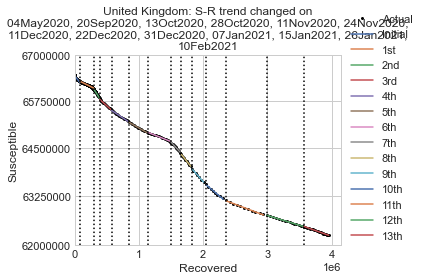


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 5th phase (07Jan2021 - 14Jan2021): finished 3003 trials in 3 min  0 sec
	 3rd phase (26Jan2021 - 09Feb2021): finished  145 trials in 0 min 10 sec
	 6th phase (11Nov2020 - 23Nov2020): finished  146 trials in 0 min 10 sec
	10th phase (24Nov2020 - 10Dec2020): finished   89 trials in 0 min 10 sec
	 4th phase (22Dec2020 - 30Dec2020): finished   73 trials in 0 min 10 sec
	13th phase (28Oct2020 - 10Nov2020): finished 1415 trials in 3 min  1 sec
	 7th phase (16Feb2020 - 03May2020): finished 1366 trials in 3 min  2 sec
	 0th phase (13Oct2020 - 27Oct2020): finished 1381 trials in 3 min  1 sec
	11th phase (31Dec2020 - 06Jan2021): finished   95 trials in 0 min 10 sec
	12th phase (15Jan2021 - 25Jan2021): finished   78 trials in 0 min 10 sec
	 9th phase (10Feb2021 - 05Mar2021): finished   78 trials in 0 min 10 sec
	 8th phase (11Dec2020 - 21Dec2020): finished 1383 trials in 3 min  2 sec
	 1st phase (20Sep2020 - 12Oct2020): fi

,Measure,rho,sigma,1/gamma [day],1/beta [day]
0,School_closing,0.007208,0.002698,38.546154,11.592308
1,Workplace_closing,0.007422,0.002645,39.765766,11.198198
2,Cancel_events,0.005221,0.003337,24.965616,14.269341
3,Gatherings_restrictions,0.005190,0.003346,24.760116,14.315029
4,Transport_closing,0.005257,0.003323,25.205128,14.216524
5,Stay_home_restrictions,0.007418,0.002658,39.842593,11.259259
6,Internal_movement_restrictions,0.011476,0.000929,67.000000,5.000000
7,International_movement_restrictions,0.004181,0.004002,16.819444,15.722222
8,Information_campaigns,0.005560,0.003206,27.243902,13.766938
9,Testing_policy,0.004000,0.003807,16.760274,16.078767


School_closing {'sigma': 0.002698319694846128, 'rho': 0.007208256769084035}
Workplace_closing {'sigma': 0.0026451202964306157, 'rho': 0.007421948975285297}
Cancel_events {'sigma': 0.003336975971185236, 'rho': 0.005221189969129784}
Gatherings_restrictions {'sigma': 0.0033459265028043935, 'rho': 0.005189935270672288}
Transport_closing {'sigma': 0.003323257414532785, 'rho': 0.005256829616301594}
Stay_home_restrictions {'sigma': 0.002657906711846202, 'rho': 0.007418410425866185}
Internal_movement_restrictions {'sigma': 0.0009293692786801682, 'rho': 0.011475948047782623}
International_movement_restrictions {'sigma': 0.00400158043048737, 'rho': 0.004181104965953069}
Stringency_index {'sigma': 0.004148025188713473, 'rho': 0.003920533165593394}
China


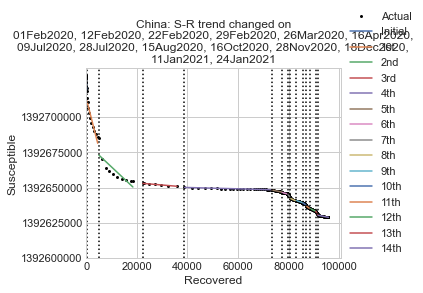


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 5th phase (22Jan2020 - 31Jan2020): finished 2250 trials in 3 min  1 sec
	13th phase (29Feb2020 - 25Mar2020): finished   78 trials in 0 min 10 sec
	 3rd phase (01Feb2020 - 11Feb2020): finished 1181 trials in 3 min  1 sec
	14th phase (16Oct2020 - 27Nov2020): finished 1285 trials in 3 min  2 sec
	 6th phase (28Jul2020 - 14Aug2020): finished 1181 trials in 3 min  2 sec
	 7th phase (28Nov2020 - 17Dec2020): finished 1136 trials in 3 min  2 sec
	 0th phase (15Aug2020 - 15Oct2020): finished   34 trials in 0 min 10 sec
	 4th phase (22Feb2020 - 28Feb2020): finished  867 trials in 3 min  3 sec
	10th phase (09Jul2020 - 27Jul2020): finished  862 trials in 3 min  4 sec
	 1st phase (11Jan2021 - 23Jan2021): finished  887 trials in 3 min  3 sec
	 8th phase (12Feb2020 - 21Feb2020): finished  895 trials in 3 min  4 sec
	11th phase (26Mar2020 - 15Apr2020): finished   80 trials in 0 min 10 sec
	 2nd phase (18Dec2020 - 10Jan2021): fi

,Measure,rho,sigma,1/gamma [day],1/beta [day]
0,School_closing,0.000239,0.000240,31.627907,70.945736
1,Workplace_closing,0.000260,0.000242,27.875000,54.329545
2,Cancel_events,0.000228,0.000252,20.645729,39.494975
3,Gatherings_restrictions,0.000233,0.000247,21.336986,40.986301
4,Transport_closing,0.000118,0.000312,13.000000,35.000000
5,Stay_home_restrictions,0.000118,0.000312,13.000000,35.000000
6,Internal_movement_restrictions,0.000118,0.000312,13.000000,35.000000
7,International_movement_restrictions,0.000197,0.000266,15.165698,33.337209
8,Information_campaigns,0.000228,0.000252,20.645729,39.494975
9,Testing_policy,0.000200,0.000265,15.205882,30.841176


School_closing {'sigma': 0.0002401051575984052, 'rho': 0.00023871651690072633}
Workplace_closing {'sigma': 0.00024177976805957668, 'rho': 0.00025961944983004127}
Cancel_events {'sigma': 0.0002523201790928173, 'rho': 0.00022822970734332124}
Gatherings_restrictions {'sigma': 0.00024748658737312984, 'rho': 0.0002326524800812943}
Transport_closing {'sigma': 0.0003115865898977496, 'rho': 0.00011775314320886589}
Stay_home_restrictions {'sigma': 0.0003115865898977496, 'rho': 0.00011775314320886589}
Internal_movement_restrictions {'sigma': 0.0003115865898977496, 'rho': 0.00011775314320886589}
International_movement_restrictions {'sigma': 0.00026598065582776696, 'rho': 0.00019714838140423615}
Stringency_index {'sigma': 0.0002667607326082858, 'rho': 0.00016643358995426362}
India


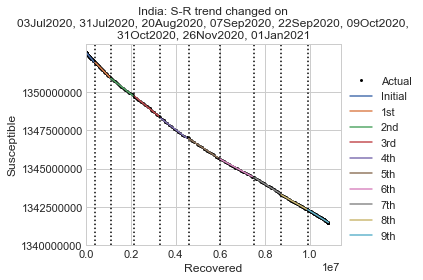


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 5th phase (13Feb2020 - 02Jul2020): finished 2468 trials in 3 min  1 sec
	 3rd phase (22Sep2020 - 08Oct2020): finished   93 trials in 0 min 10 sec
	 0th phase (09Oct2020 - 30Oct2020): finished   94 trials in 0 min 10 sec
	 4th phase (01Jan2021 - 05Mar2021): finished   93 trials in 0 min 10 sec
	 8th phase (31Oct2020 - 25Nov2020): finished   94 trials in 0 min 10 sec
	 6th phase (03Jul2020 - 30Jul2020): finished   94 trials in 0 min 10 sec
	 2nd phase (26Nov2020 - 31Dec2020): finished   84 trials in 0 min 10 sec
	 7th phase (07Sep2020 - 21Sep2020): finished 1638 trials in 3 min  2 sec
	 1st phase (31Jul2020 - 19Aug2020): finished 1695 trials in 3 min  1 sec
	 9th phase (20Aug2020 - 06Sep2020): finished 1783 trials in 3 min  1 sec
Completed optimization. Total: 6 min 24 sec


,Measure,rho,sigma,1/gamma [day],1/beta [day]
0,School_closing,0.096502,0.056309,31.212766,10.329787
1,Workplace_closing,0.108639,0.017053,58.000000,9.000000
2,Cancel_events,0.093856,0.063590,26.684814,10.624642
3,Gatherings_restrictions,0.108639,0.017053,58.000000,9.000000
4,Transport_closing,0.108639,0.017053,58.000000,9.000000
5,Stay_home_restrictions,0.092882,0.049166,35.646341,10.902439
6,Internal_movement_restrictions,0.099754,0.051616,33.729508,9.897541
7,International_movement_restrictions,0.100251,0.053990,31.062857,9.771429
8,Information_campaigns,0.094188,0.062547,27.386555,10.588235
9,Testing_policy,0.097305,0.040152,41.921053,10.368421


School_closing {'sigma': 0.05630904408070026, 'rho': 0.09650240793522033}
Workplace_closing {'sigma': 0.01705332452018248, 'rho': 0.10863855362575382}
Cancel_events {'sigma': 0.06359033599375749, 'rho': 0.09385629566823579}
Gatherings_restrictions {'sigma': 0.01705332452018248, 'rho': 0.10863855362575386}
Transport_closing {'sigma': 0.01705332452018248, 'rho': 0.10863855362575386}
Stay_home_restrictions {'sigma': 0.04916573644304293, 'rho': 0.09288249629621499}
Internal_movement_restrictions {'sigma': 0.051615921352147744, 'rho': 0.0997543975323823}
International_movement_restrictions {'sigma': 0.05398998011806604, 'rho': 0.1002505528175634}
Stringency_index {'sigma': 0.017053324520182475, 'rho': 0.10863855362575382}
Japan


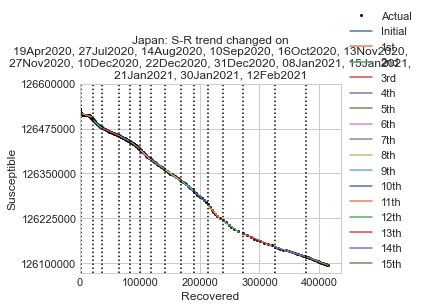


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 5th phase (14Aug2020 - 09Sep2020): finished  155 trials in 0 min 10 sec
	 6th phase (15Jan2021 - 20Jan2021): finished  104 trials in 0 min 10 sec	15th phase (22Dec2020 - 30Dec2020): finished  104 trials in 0 min 10 sec

	 7th phase (31Dec2020 - 07Jan2021): finished   93 trials in 0 min 10 sec
	 3rd phase (19Apr2020 - 26Jul2020): finished 1226 trials in 3 min  1 sec
	14th phase (16Oct2020 - 12Nov2020): finished 1257 trials in 3 min  2 sec
	13th phase (13Nov2020 - 26Nov2020): finished 1258 trials in 3 min  2 sec
	 4th phase (10Dec2020 - 21Dec2020): finished   91 trials in 0 min 10 sec
	10th phase (27Nov2020 - 09Dec2020): finished 1248 trials in 3 min  1 sec
	 8th phase (21Jan2021 - 29Jan2021): finished   84 trials in 0 min 10 sec
	12th phase (30Jan2021 - 11Feb2021): finished   87 trials in 0 min 10 sec
	 2nd phase (10Sep2020 - 15Oct2020): finished  236 trials in 0 min 30 sec
	 9th phase (12Feb2021 - 04Mar2021): fi

,Measure,rho,sigma,1/gamma [day],1/beta [day]
0,School_closing,0.000999,0.000990,13.090253,16.483755
1,Workplace_closing,0.001130,0.000800,21.511811,13.562992
2,Cancel_events,0.001369,0.001119,11.071429,8.857143
3,Gatherings_restrictions,0.001033,0.001077,11.423729,12.661017
4,Transport_closing,0.001176,0.001080,11.351064,11.127660
5,Stay_home_restrictions,0.001085,0.000990,14.227273,14.094697
6,Internal_movement_restrictions,0.001061,0.000852,19.421053,14.985380
7,International_movement_restrictions,0.001092,0.001079,11.342466,11.958904
8,Information_campaigns,0.001006,0.000820,19.958005,16.556430
9,Testing_policy,0.001034,0.001011,12.722433,15.498099


School_closing {'sigma': 0.0009902648502243272, 'rho': 0.0009994227180040503}
Workplace_closing {'sigma': 0.0008000944632162066, 'rho': 0.001130099363741072}
Cancel_events {'sigma': 0.0011186718072142795, 'rho': 0.0013693603114428713}
Gatherings_restrictions {'sigma': 0.0010770044290302476, 'rho': 0.0010329874137998925}
Transport_closing {'sigma': 0.0010799000900630067, 'rho': 0.0011762829302022187}
Stay_home_restrictions {'sigma': 0.0009902480526241162, 'rho': 0.0010854459179379934}
Internal_movement_restrictions {'sigma': 0.0008517188433053726, 'rho': 0.001060664850262262}
International_movement_restrictions {'sigma': 0.001078541010798555, 'rho': 0.0010924404329906215}
Stringency_index {'sigma': 0.0013003557638418249, 'rho': 0.0007674294835536856}
United States


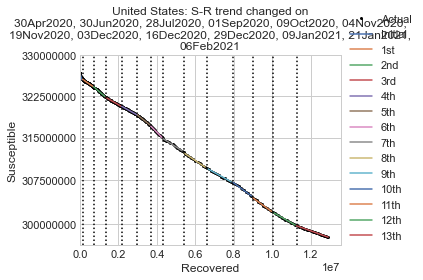


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 5th phase (09Feb2020 - 29Apr2020): finished 2082 trials in 3 min  2 sec
	13th phase (06Feb2021 - 05Mar2021): finished   73 trials in 0 min 10 sec
	 3rd phase (04Nov2020 - 18Nov2020): finished   75 trials in 0 min 10 sec
	 7th phase (29Dec2020 - 08Jan2021): finished   75 trials in 0 min 10 sec
	 6th phase (21Jan2021 - 05Feb2021): finished   74 trials in 0 min 10 sec
	 4th phase (03Dec2020 - 15Dec2020): finished   67 trials in 0 min 10 sec
	 1st phase (01Sep2020 - 08Oct2020): finished   87 trials in 0 min 10 sec
	11th phase (19Nov2020 - 02Dec2020): finished   85 trials in 0 min 10 sec
	12th phase (16Dec2020 - 28Dec2020): finished   77 trials in 0 min 10 sec
	10th phase (28Jul2020 - 31Aug2020): finished 1132 trials in 3 min  2 sec
	 0th phase (09Oct2020 - 03Nov2020): finished 1141 trials in 3 min  2 sec
	 8th phase (30Jun2020 - 27Jul2020): finished 1133 trials in 3 min  2 sec
	 9th phase (09Jan2021 - 20Jan2021): fi

,Measure,rho,sigma,1/gamma [day],1/beta [day]
0,School_closing,0.000114,0.000045,122.000000,48.000000
1,Workplace_closing,0.001006,0.000023,238.000000,5.000000
2,Cancel_events,0.001006,0.000023,238.000000,5.000000
3,Gatherings_restrictions,0.001006,0.000023,238.000000,5.000000
4,Transport_closing,0.001006,0.000023,238.000000,5.000000
5,Stay_home_restrictions,0.001006,0.000023,238.000000,5.000000
6,Internal_movement_restrictions,0.001006,0.000023,238.000000,5.000000
7,International_movement_restrictions,0.000268,0.000037,162.763736,53.640110
8,Information_campaigns,0.000250,0.000038,160.966102,54.892655
9,Testing_policy,0.000075,0.000038,171.000000,110.115385


School_closing {'sigma': 4.523276477533729e-05, 'rho': 0.00011409052537018224}
Workplace_closing {'sigma': 2.334107838121607e-05, 'rho': 0.0010061988406932368}
Cancel_events {'sigma': 2.334107838121607e-05, 'rho': 0.0010061988406932368}
Gatherings_restrictions {'sigma': 2.334107838121607e-05, 'rho': 0.0010061988406932366}
Transport_closing {'sigma': 2.3341078381216067e-05, 'rho': 0.0010061988406932368}
Stay_home_restrictions {'sigma': 2.3341078381216067e-05, 'rho': 0.0010061988406932366}
Internal_movement_restrictions {'sigma': 2.334107838121607e-05, 'rho': 0.0010061988406932366}
International_movement_restrictions {'sigma': 3.7306169254203756e-05, 'rho': 0.00026848436217309456}
Stringency_index {'sigma': 2.3341078381216067e-05, 'rho': 0.0010061988406932366}
Australia


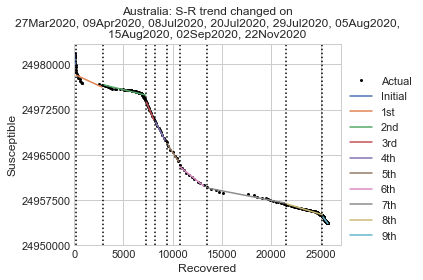


<SIR-D model: parameter estimation>
Running optimization with 4 CPUs...
	 5th phase (19Mar2020 - 26Mar2020): finished 1975 trials in 3 min  1 sec
	 4th phase (29Jul2020 - 04Aug2020): finished 1472 trials in 3 min  1 sec
	 3rd phase (05Aug2020 - 14Aug2020): finished 1445 trials in 3 min  1 sec
	 0th phase (27Mar2020 - 08Apr2020): finished 1440 trials in 3 min  1 sec
	 7th phase (09Apr2020 - 07Jul2020): finished  960 trials in 3 min  3 sec
	 8th phase (20Jul2020 - 28Jul2020): finished   91 trials in 0 min 10 sec
	 9th phase (02Sep2020 - 21Nov2020): finished   65 trials in 0 min 10 sec
	 6th phase (08Jul2020 - 19Jul2020): finished 1653 trials in 3 min  1 sec
	 2nd phase (15Aug2020 - 01Sep2020): finished 1639 trials in 3 min  1 sec
	 1st phase (22Nov2020 - 05Mar2021): finished 1159 trials in 3 min  3 sec
Completed optimization. Total: 9 min  9 sec


,Measure,rho,sigma,1/gamma [day],1/beta [day]
0,School_closing,0.000022,0.000023,32.448718,59.525641
1,Workplace_closing,0.000020,0.000017,37.153846,74.747253
2,Cancel_events,0.000024,0.000019,37.228448,69.284483
3,Gatherings_restrictions,0.000036,0.000021,37.360656,44.819672
4,Transport_closing,0.000014,0.000016,38.876712,89.270548
5,Stay_home_restrictions,0.000008,0.000016,35.000000,87.857143
6,Internal_movement_restrictions,0.000004,0.000002,47.000000,121.000000
7,International_movement_restrictions,0.000018,0.000016,39.135693,82.356932
8,Information_campaigns,0.000018,0.000016,39.135693,82.356932
9,Testing_policy,0.000019,0.000023,32.348958,66.401042


School_closing {'sigma': 2.28847267805022e-05, 'rho': 2.2494297846214352e-05}
Workplace_closing {'sigma': 1.686884681374558e-05, 'rho': 1.964867408950996e-05}
Cancel_events {'sigma': 1.8875118562710808e-05, 'rho': 2.3608798853855487e-05}
Gatherings_restrictions {'sigma': 2.1312419367505578e-05, 'rho': 3.6419702224587146e-05}
Transport_closing {'sigma': 1.556062794894966e-05, 'rho': 1.3848236468910568e-05}
Stay_home_restrictions {'sigma': 1.574836511711881e-05, 'rho': 8.089761893607449e-06}
Internal_movement_restrictions {'sigma': 1.8449242432208616e-06, 'rho': 4.307312640288933e-06}
International_movement_restrictions {'sigma': 1.6157220358983916e-05, 'rho': 1.803042625649367e-05}
Stringency_index {'sigma': 1.8449242432208616e-06, 'rho': 4.307312640288932e-06}


In [199]:
countries = ["Italy", "Netherlands", "Sweden", "Germany", "United Kingdom", "China", "India", "Japan", "United States", "Australia"]
# countries = ["Sweden", "Germany", "United Kingdom", "China", "India", "Japan", "United States", "Australia"]
for country in countries:
    print(country)
    s = cs.Scenario(jhu_data, population_data, country=country)
    days, df_periods = s.estimate_delay(oxcgrt_data)

    s.trend()
    s.estimate(cs.SIRD)
    tracker = s.track()
    tracker = tracker.set_index("Date")
    tracker = tracker.groupby("Date").mean()
    tracker = tracker.shift(days)
    ox_df = oxcgrt_data.cleaned()
    ox_df = ox_df[ox_df["Country"] == country]
    ox_df = ox_df.groupby("Date").mean()
    merged = pd.merge(ox_df.reset_index(), tracker.reset_index(), on="Date", how="inner")

    measures = ox_df.columns
#     interests = ["theta", "kappa", "rho", "sigma", "1/gamma [day]", "alpha1 [-]",  "1/alpha2 [day]", "1/beta [day]", "Measure"]
    interests = ["rho", "sigma",  "1/gamma [day]", "1/beta [day]", "Measure"]
   
    params_total = pd.DataFrame(columns=interests)

    for i in range(len(measures)):
        measure = measures[i]
        values = ox_df[measure].values
        high = np.max(values)
        dates = ox_df[ox_df[measure] == high].reset_index()["Date"]
        subset = tracker.reset_index()[tracker.reset_index()["Date"].isin(dates)]
        means_df = subset[interests[:-1]].mean()
        means_df["Measure"] = measure
        params_total.loc[i] = means_df
    params_total = params_total.set_index("Measure")
    params_total = params_total.reset_index()
    display(params_total)
    all_infecteds = pd.DataFrame()
    target = "Infected"
    measures_new = ['School_closing', 'Workplace_closing', 'Cancel_events',
           'Gatherings_restrictions', 'Transport_closing',
           'Stay_home_restrictions', 'Internal_movement_restrictions',
           'International_movement_restrictions', "Stringency_index"]

    for measure in measures_new:
        name = measure
        selection = params_total[params_total["Measure"] == name]
        preset_dict = {
#             "theta": selection["theta"].values[0],
#             "kappa": selection["kappa"].values[0],
            "sigma": selection["sigma"].values[0],
            "rho": selection["rho"].values[0]
        }
        print(measure, preset_dict)
        s.summary()

        s.clear(name=name)
        s.add(name=name, 
              end_date='31Mar2021',
              **preset_dict,
              mode=cs.SIRD)
        records = s.simulate(name=name, show_figure=False)
        all_infecteds[measure] = records[target]

    all_infecteds["Date"] = records["Date"]
    all_infecteds.to_pickle(country + "measuresSIRD")
#     all_infecteds_subsection = all_infecteds.query("Date>='2021-01-01'")

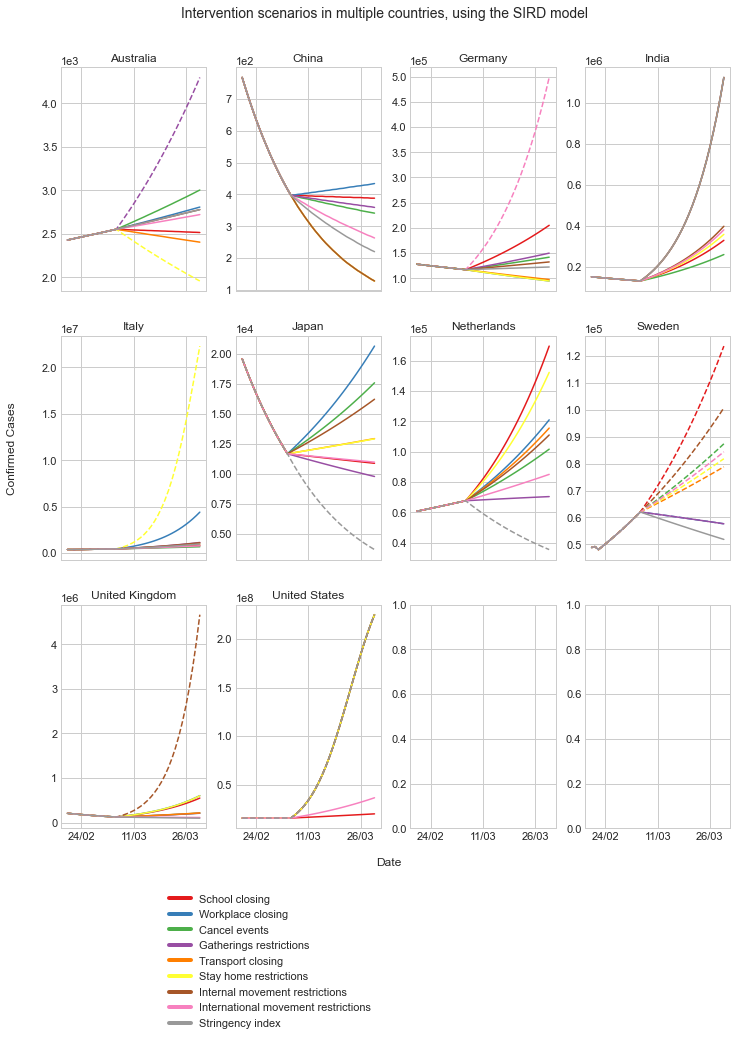

In [200]:
import matplotlib.dates as mdates
from matplotlib.lines import Line2D


plt.style.use('seaborn-whitegrid')
countries = ["Italy", "Netherlands", "Sweden", "Germany", "United Kingdom", "China", "India", "Japan", "United States", "Australia"]

countries = np.sort(countries)

measures_new = ['School_closing', 'Workplace_closing', 'Cancel_events',
           'Gatherings_restrictions', 'Transport_closing',
           'Stay_home_restrictions', 'Internal_movement_restrictions',
           'International_movement_restrictions', "Stringency_index"]
measures_new_str = []
for i in measures_new:
    measures_new_str.append(i.replace("_", " "))
    
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, figsize=(12, 14), constrained_layout=False)
axes = axes.flatten()
fig.suptitle("Intervention scenarios in multiple countries, using the SIRD model", fontsize=14,  y=0.94)

for i in range(len(countries)):
    ms_df = pickle.load(open(countries[i] + "measuresSIRD", "rb"))
    ms_df = ms_df.query("Date>='2021-02-20'")
    ms_df = ms_df.query("Date<='2021-03-30'")
    ms_mean = np.mean(ms_df[measures_new], axis=1)
    for meas, color in zip(measures_new, color_list):
        if countries[i] == "United States" and (meas == "Stringency_index" or meas == "Internal_movement_restrictions"):
            axes[i].plot(ms_df["Date"], ms_df[meas], color=color, linestyle="dashed")
        elif countries[i] == "Sweden" and (meas != "Stringency_index" and meas != "Gatherings_restrictions"):
            axes[i].plot(ms_df["Date"], ms_df[meas], color=color, linestyle="dashed")
        elif np.sum(abs(ms_df[meas].values - ms_mean)) < np.std(ms_mean)* 60:
            axes[i].plot(ms_df["Date"], ms_df[meas], color=color)
        else:
            axes[i].plot(ms_df["Date"], ms_df[meas], color=color, linestyle="dashed")
#     axes[i].axvline(x=datetime.datetime(2021, 3, 1), color="grey", linestyle=":")
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(4))
    axes[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axes[i].title.set_text(countries[i])

legend_elements = []
for leg, color in zip(measures_new_str, color_list):
    legend_elements.append(Line2D([0], [0], color=color, lw=4, label=leg))
# fig, ax = plt.subplots()
axes[i].legend(handles=legend_elements, bbox_to_anchor=(1, -0.25), ncol=1, loc="bottom")
axes[8].set_xlabel("Date")
axes[8].xaxis.set_label_coords(2.25, -0.13)
axes[8].set_ylabel("Confirmed Cases")
axes[8].yaxis.set_label_coords(-0.3, 1.7)

plt.format_xdata = mdates.DateFormatter('%Y-%m')
plt.savefig("measures_all_countries_newSIRD")
plt.show()

In [177]:
measures_new_str = []
for i in measures_new:
    measures_new_str.append(i.replace("_", " "))
    

In [126]:
import matplotlib
colors = matplotlib.cm.get_cmap('Set1') 
color_list = []
for cl in range(len(measures_new)):
    color_list.append(colors(cl))
color_list

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804, 1.0),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726, 1.0),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098, 1.0),
 (1.0, 0.4980392156862745, 0.0, 1.0),
 (1.0, 1.0, 0.2, 1.0),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392, 1.0),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373, 1.0),
 (0.6, 0.6, 0.6, 1.0)]